### evaluate

In [6]:
from stable_baselines3 import PPO
from geneEnv import geneEnv

model = PPO.load('result/TwoDiseInverse/error/trained_model.zip')

print("Evaluating")
#env = model.get_env()
env = geneEnv(2,32,80)
#model.set_env(env)


#check_env(env)

test = []
for tt in range(5):
    obs, _ = env.reset()

    reward_list = []
    for i in range(1000):
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, _, info = env.step(action)
        reward_list.append(reward)
        #print(obs)

    print(sum(reward_list)/len(reward_list))
    test.append(sum(reward_list)/len(reward_list))
    
print(sum(test)/len(test))

Evaluating
64.0
64.0
64.0
64.0
64.0
64.0


In [4]:
from stable_baselines3 import PPO
from geneEnv import geneEnv

model = PPO.load('result/TwoDise/error/trained_model.zip')

print("Evaluating")
#env = model.get_env()
env = geneEnv(2,32,80)
#model.set_env(env)


#check_env(env)

test = []
for tt in range(5):
    obs, _ = env.reset()

    reward_list = []
    for i in range(1000):
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, _, info = env.step(action)
        reward_list.append(reward)
        #print(obs)

    print(sum(reward_list)/len(reward_list))
    test.append(sum(reward_list)/len(reward_list))
    
print(sum(test)/len(test))

Evaluating
60.554
49.858
54.527
53.521
48.829
53.457800000000006


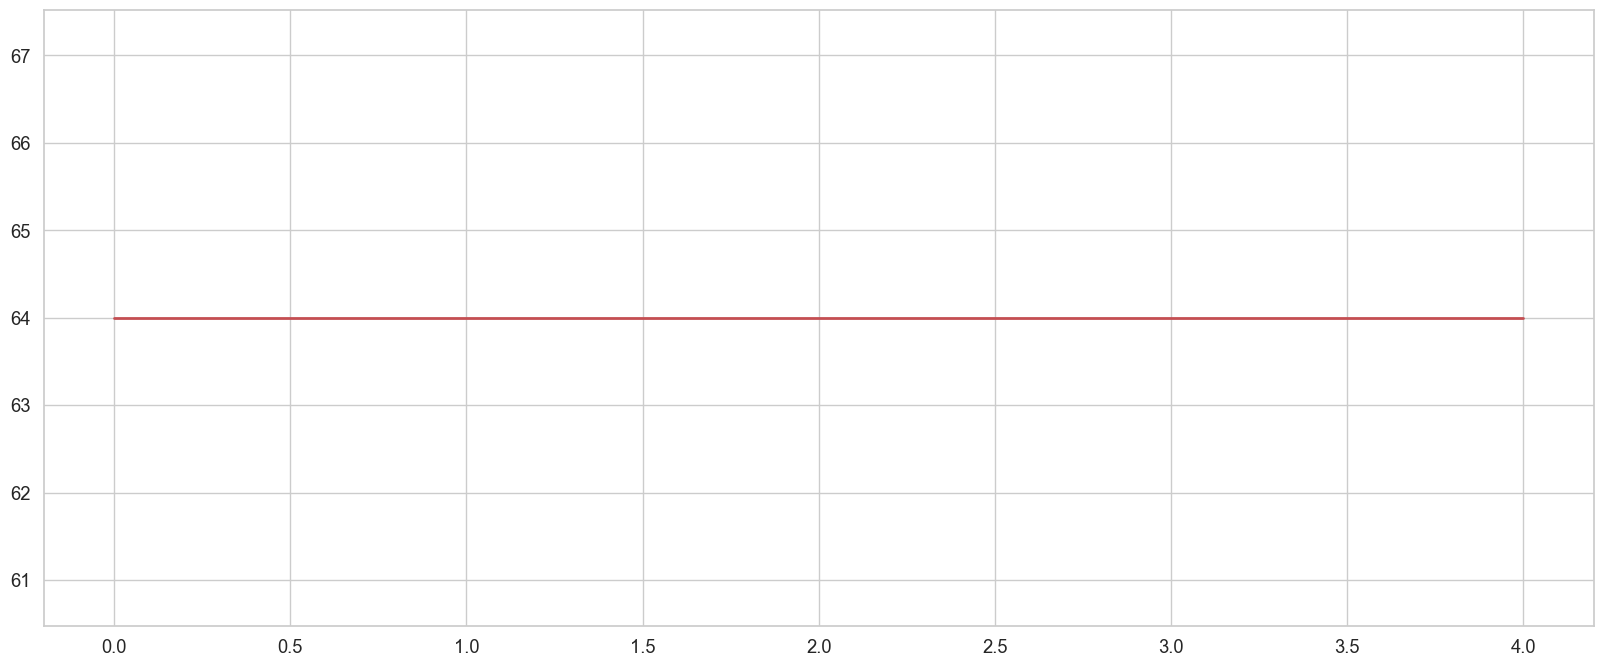

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
plt.plot(reward_list,'r')
plt.grid(True)
plt.show()

In [6]:
import csv
import seaborn as sns
import matplotlib.pyplot as plt

folderPath = 'result/TwoDiseInverse/error/'

f1 = open(folderPath+'monitor.csv','r',encoding='UTF8')

f = csv.reader(f1,delimiter=',')
next(f)
next(f)
next(f)

rewards_inv = []
for row in f:
    rewards_inv.append(float(row[0]))
    
edited_rewards_inv = []
for i in range(0,len(rewards_inv)-1000,1000):
    edited_rewards_inv.append(sum(rewards_inv[i:i+1000])/1000)





In [7]:
import csv
import seaborn as sns
import matplotlib.pyplot as plt

folderPath = 'result/TwoDise/error/'

f1 = open(folderPath+'monitor.csv','r',encoding='UTF8')

f = csv.reader(f1,delimiter=',')
next(f)
next(f)
next(f)

rewards_tds = []
for row in f:
    rewards_tds.append(float(row[0]))
    
edited_rewards_tds = []
for i in range(0,len(rewards_tds)-1000,1000):
    edited_rewards_tds.append(sum(rewards_tds[i:i+1000])/1000)



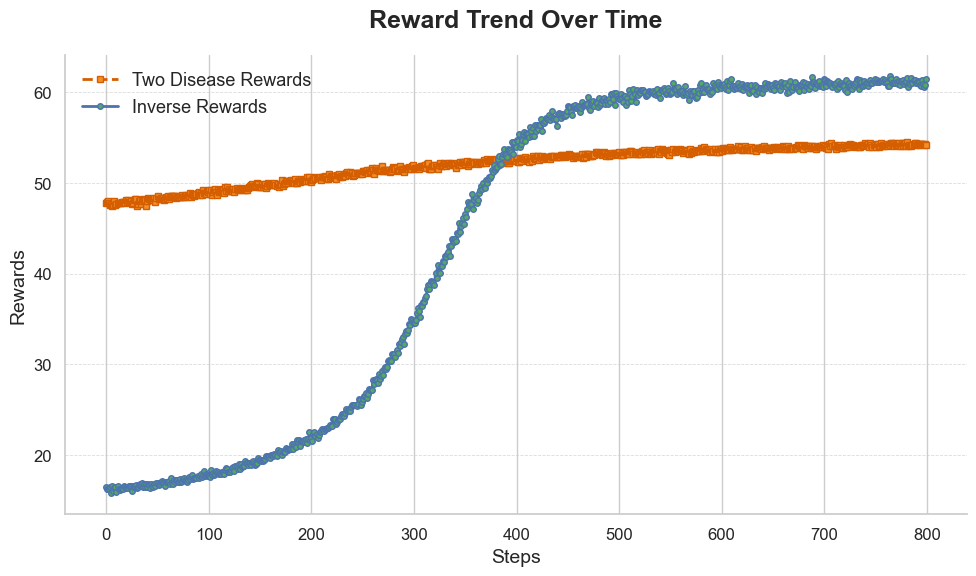

In [8]:
# Seaborn 스타일 설정 (모던하고 깔끔한 스타일로 설정)
sns.set(style="whitegrid", font_scale=1.2, rc={"lines.linewidth": 2})

# 플롯 크기 설정
plt.figure(figsize=(10, 6))

# 곡선 플롯
plt.plot(edited_rewards_tds, color="#D55E00", label='Two Disease Rewards', linestyle='--', marker='s', markersize=4, markerfacecolor="#F28E2B")
plt.plot(edited_rewards_inv, color="#4C72B0", label='Inverse Rewards', linestyle='-', marker='o', markersize=4, markerfacecolor="#55A868")

# 그래프 제목과 축 레이블 (모던한 서체와 적절한 폰트 크기 설정)
plt.title('Reward Trend Over Time', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Steps', fontsize=14)
plt.ylabel('Rewards', fontsize=14)

# 눈금 표시 설정
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 그리드 설정 (세로선만 표시, 과하지 않게)
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.6, alpha=0.7)

# 레전드 추가
plt.legend(loc='best', frameon=False, fontsize=13)

# 스타일에 모던한 감각을 더하는 '축 오른쪽과 위쪽 제거' (논문용 그래프에서 자주 사용되는 간결한 스타일)
sns.despine()

# 그래프 저장 (고해상도, 논문용으로 적합)
plt.tight_layout()
#plt.savefig('rewards_graph.png', dpi=300, bbox_inches='tight')

# 그래프 출력
plt.show()